1.CAPTURING THE SCREEN
2.GENERATING DATASET & LOAD it
3.FITTING MODEL (BY SVM) & CALCULATING ACCURACY
4.IMAGE PREDICTION DRAWN IN PAINT

In [5]:
#1 capturing the screen by opening paint and drawing digits
import pyscreenshot as ImageGrab
import time
pics_folder="capturedpics/0/"
for i in range(0,100):
    time.sleep(8)
    image=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
    print("saved",i)
    image.save(pics_folder+str(i)+'.png')
    print("now clearing the screen & redraw now.")

saved 0
now clearing the screen & redraw now.
saved 1
now clearing the screen & redraw now.
saved 2
now clearing the screen & redraw now.
saved 3
now clearing the screen & redraw now.
saved 4
now clearing the screen & redraw now.


In [6]:
#2 generating dataset
import cv2
import csv
import glob

header  =["label"]
for i in range(0,784):
    header.append("pixel-"+str(i))
with open('dataset.csv', 'a') as f:      
    writer = csv.writer(f)
    writer.writerow(header)
    
for label in range(10):
    dList = glob.glob("capturedpics/"+str(label)+"/*.png")
    
    for image_path in dList:
        image= cv2.imread(image_path)      #reading image
        image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)    #changing into black&white 
        image_gray = cv2.GaussianBlur(image_gray,(15,15), 0)    #blurring image to get clear result
        roi= cv2.resize(image_gray,(28,28), interpolation=cv2.INTER_AREA) #setting in 28*28 by pixel
        
        data=[]
        data.append(label)
        rows, columns = roi.shape
        
        #Add pixel one by one into data array
        for i in range(rows):
            for j in range(columns):
                k =roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
                
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)
            

#loading the dataset
import pandas as pd
from sklearn.utils import shuffle
data=pd.read_csv('dataset.csv')
data=shuffle(data)
data

,label,pixel-0,pixel-1,pixel-2,pixel-3,pixel-4,pixel-5,pixel-6,pixel-7,pixel-8,...,pixel-774,pixel-775,pixel-776,pixel-777,pixel-778,pixel-779,pixel-780,pixel-781,pixel-782,pixel-783
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
678,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
729,7,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
639,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


8


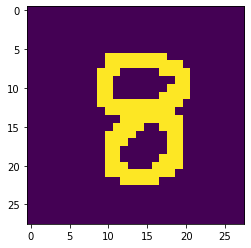

In [9]:
#separation of dependent & independent variable
X = data.drop(["label"],axis=1)
Y= data["label"]
#preview of image using matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt 
import cv2 
index = 808 
img = X.loc[index].values.reshape(28,28)
print(Y[index])
plt.imshow(img)

In [10]:
#train-Test split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.2)

In [11]:
#3.Fit the model using SVC & also save the model using joblib
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 6)
classifier.fit(train_x, train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [12]:
#Calculate accuracy
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy = ",metrics.accuracy_score(prediction, test_y))

Accuracy =  0.965


In [ ]:
#GUI Handwritten digit recognition
import tkinter as tk
from tkinter import *
from tkinter import messagebox

window=tk.Tk()
window.title("Handwritten digit recognition")

def prediction():
    import joblib
    import cv2
    import numpy as np #pip install numpy
    import time
    import pyscreenshot as ImageGrab
    import os
    os.startfile("C:/ProgramData/Microsoft/Windows/Start Menu/Programs/Accessories/Paint")
    
    model=joblib.load("model/digit_recognizer")
    pics_folder="img/"
    time.sleep(15)
    while True:
        img=ImageGrab.grab(bbox=(60,170,400,500))

        img.save(pics_folder+"img.png")
        image = cv2.imread(pics_folder+"img.png")
        image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        image_gray  =cv2.GaussianBlur(image_gray, (15,15), 0)

        #Threshold the image
        ret, im_th = cv2.threshold(image_gray,100, 255, cv2.THRESH_BINARY)
        roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)

        rows,columns=roi.shape

        X = []

        #Add pixel one by one into data array
        for i in range(rows):
            for j in range(columns):
                k = roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                X.append(k)

        predictions  =model.predict([X])
        print("Prediction:",predictions[0])
        cv2.putText(image, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)

        cv2.startWindowThread()
        cv2.namedWindow("Result")
        cv2.imshow("Result",image)
        cv2.waitKey(10000)
        break
        if cv2.waitKey(1)==13: #13 is the ascii value of enter
            break
    cv2.destroyAllWindows()
    
b1=tk.Button(window,text="Live prediction:Opening the paint draw any digit(0-9)", font=('Algerian',15),bg="white",fg="red",command=prediction)
b1.place(x=5, y=50)

window.geometry("600x200")
window.mainloop()
